In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

ds = fetch_california_housing(as_frame=True)
df = ds.frame.copy()
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

### Simple Linear Regression

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    "model__alpha": [0.001, 0.01, 0.1, 1.0, 10.0],
    "model__l1_ratio": [0.0, 0.5, 1.0],
}
model = ElasticNet(max_iter=1000)

pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ("model", model)])

cv = KFold(n_splits=5, shuffle=True)

gscv = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    refit=True,
)

gscv.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/reference_solution/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.443e+03, tolerance: 1.755e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniconda/base/envs/reference_solution/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.477e+03, tolerance: 1.768e+00
Linear regression models with a zero l1 penalization strength are mor

,estimator,Pipeline(step...lasticNet())])
,param_grid,"{'model__alpha': [0.001, 0.01, ...], 'model__l1_ratio': [0.0, 0.5, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best = gscv.best_estimator_
y_pred = best.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [4]:
print(f'Best alpha: {best["model"].alpha}')
print(f'Best L1 ratio: {best["model"].l1_ratio}')
print('=' * 30)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

Best alpha: 0.001
Best L1 ratio: 1.0
RMSE: 0.53
MAE: 0.54
R2: 0.60


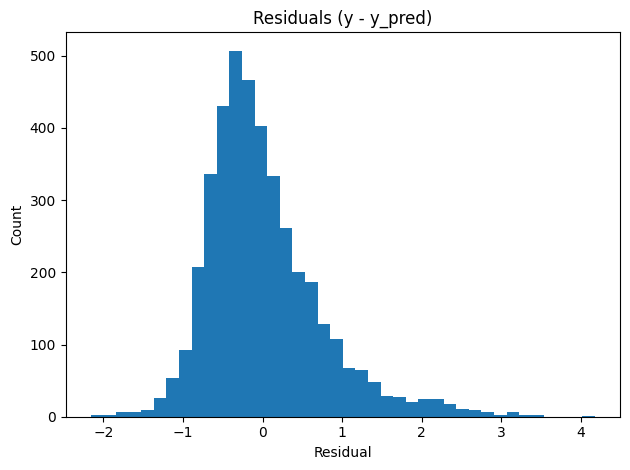

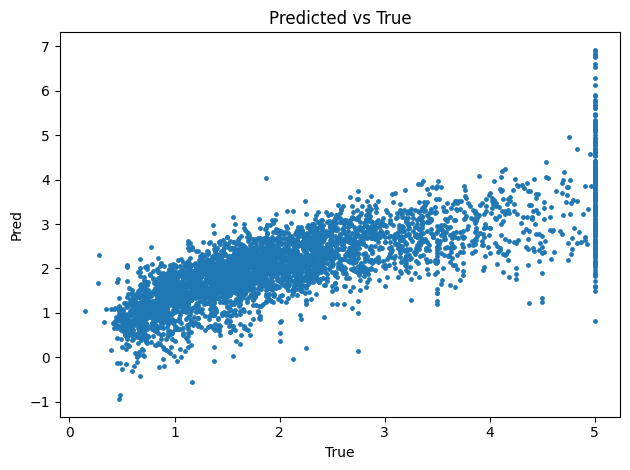

In [5]:
import matplotlib.pyplot as plt
import os

os.makedirs("figures", exist_ok=True)

# Plots — keep visualization in notebook after you refactor logic into src/
plt.figure()
plt.hist(y_test - y_pred, bins=40)
plt.title("Residuals (y - y_pred)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join("figures", "residuals.png"))
plt.show()

plt.figure()
plt.scatter(y_test, y_pred, s=6)
plt.title("Predicted vs True")
plt.xlabel("True")
plt.ylabel("Pred")
plt.tight_layout()
plt.savefig(os.path.join("figures", "pred_vs_true.png"))
plt.show()

### Polynomial Regression

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    "model__alpha": [0.001, 0.01, 0.1, 1.0, 10.0],
    "model__l1_ratio": [0.0, 0.5, 1.0],
}
model = ElasticNet(max_iter=1000)

pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("poly", PolynomialFeatures(degree=2, include_bias=False)), ("scaler", StandardScaler()), ("model", model)])

cv = KFold(n_splits=5, shuffle=True)

gscv = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    refit=True,
)

gscv.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/reference_solution/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+03, tolerance: 1.755e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniconda/base/envs/reference_solution/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.132e+03, tolerance: 1.774e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/min

,estimator,Pipeline(step...lasticNet())])
,param_grid,"{'model__alpha': [0.001, 0.01, ...], 'model__l1_ratio': [0.0, 0.5, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best = gscv.best_estimator_
y_pred = best.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [8]:
print(f'Best alpha: {best["model"].alpha}')
print(f'Best L1 ratio: {best["model"].l1_ratio}')
print('=' * 30)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

Best alpha: 0.01
Best L1 ratio: 1.0
RMSE: 0.53
MAE: 0.54
R2: 0.60


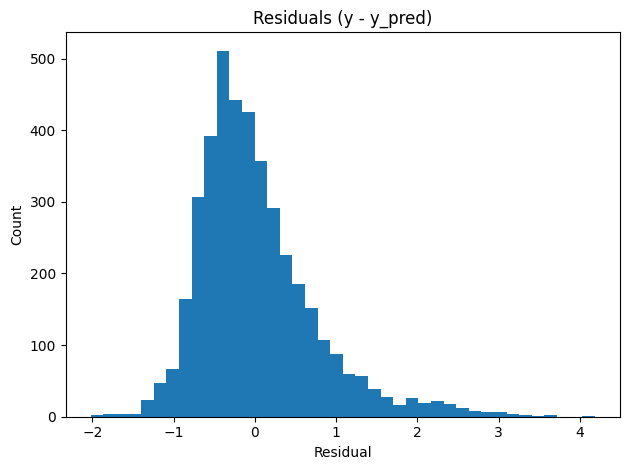

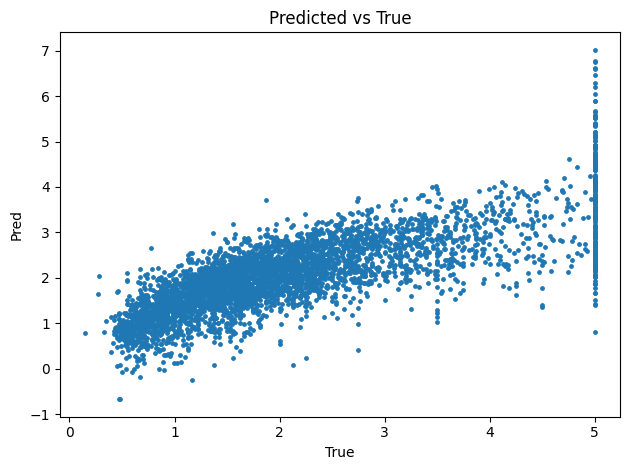

In [9]:
import matplotlib.pyplot as plt
import os

os.makedirs("figures", exist_ok=True)

# Plots — keep visualization in notebook after you refactor logic into src/
plt.figure()
plt.hist(y_test - y_pred, bins=40)
plt.title("Residuals (y - y_pred)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join("figures", "residuals.png"))
plt.show()

plt.figure()
plt.scatter(y_test, y_pred, s=6)
plt.title("Predicted vs True")
plt.xlabel("True")
plt.ylabel("Pred")
plt.tight_layout()
plt.savefig(os.path.join("figures", "pred_vs_true.png"))
plt.show()

### kNN

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    "model__n_neighbors": [2,5,10,20,50],
    "model__p": [1,2],
}
model = KNeighborsRegressor()

pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ("model", model)])

cv = KFold(n_splits=5, shuffle=True)

gscv = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    refit=True,
)

gscv.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'model__n_neighbors': [2, 5, ...], 'model__p': [1, 2]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best = gscv.best_estimator_
y_pred = best.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f'Best n_neighbors: {best["model"].n_neighbors}')
print(f'Best metric: {best["model"].p}')
print('=' * 30)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

Best n_neighbors: 10
Best metric: 1
RMSE: 0.37
MAE: 0.42
R2: 0.72


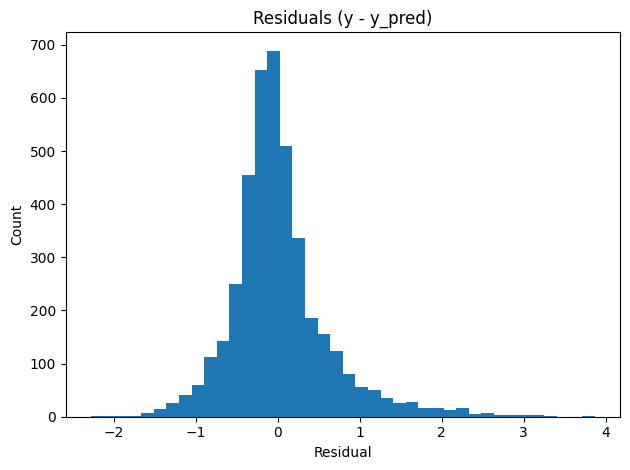

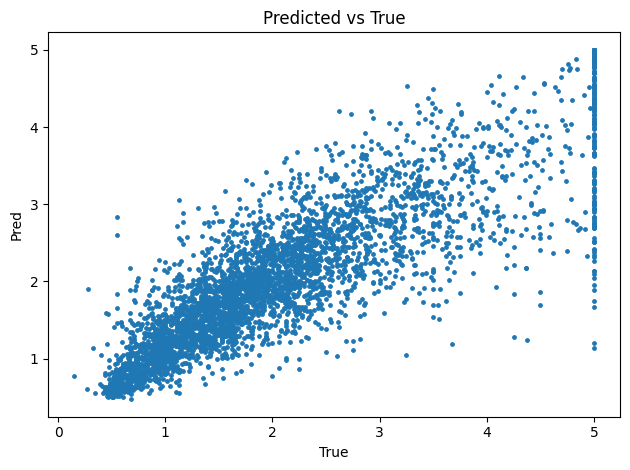

In [13]:
import matplotlib.pyplot as plt
import os

os.makedirs("figures", exist_ok=True)

# Plots — keep visualization in notebook after you refactor logic into src/
plt.figure()
plt.hist(y_test - y_pred, bins=40)
plt.title("Residuals (y - y_pred)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join("figures", "residuals.png"))
plt.show()

plt.figure()
plt.scatter(y_test, y_pred, s=6)
plt.title("Predicted vs True")
plt.xlabel("True")
plt.ylabel("Pred")
plt.tight_layout()
plt.savefig(os.path.join("figures", "pred_vs_true.png"))
plt.show()